# SIO113: Assignment #6

#### Instructor: Dave May (dmay@ucsd.edu)

#### Assistant: Brendan Cych (bcych@ucsd.edu)

#### Scripps Institution of Oceanography, UCSD, Spring 2021

----

<div class="alert alert-block alert-info"><b>Preliminary:</b>
Create a new notebook and rename it using the format YourLastname_FirstInitial_HW_06. 
For example, <b>Cych_B_HW_06</b>
</div>

<div class="alert alert-block alert-warning"><b>Note:</b>
In the following it is assumed that you imported the NumPy and Matplotlib modules into the following namespaces
    
`
import numpy as np
import matplotlib.pyplot as plt
`    
</div>

In [1]:
#importing modules
import numpy as np
import math 
import matplotlib.pyplot as plt 
from math import exp
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
import pandas as pd
import geopandas as gpd 
import geoplot as gplt
import cartopy.crs as ccrs
from cartopy.feature import NaturalEarthFeature, LAND, COASTLINE, OCEAN, LAKES, BORDERS
from cartopy import feature as cfeature
import matplotlib.ticker as mticker
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

### 1. Polynomial fits

Certain isotopes are unstable and decay through _radioactive decay_.  The formula for radioactive decay is:

$$
    N= N_o \exp\left(-\lambda T \right),
$$

where

  $\lambda$ is the decay constant (the time for $N$ to decay to $1/e$ of the original value),

  $T$ is time,

  $N$ is the number of nuclei remaining after time $T$ and

  $N_o$ is the original number or parent nuclei.

The _half-life_ ($t_{1/2}$) is the time for $N$ to decay to $N_o$/2. The formula is:

$$
t_{1/2} = \frac{\ln(2)}{\lambda}.
$$

1. Write a `lambda` function to calculate radioactive decay. The decay constant, time, and initial parent should be supplied as parameters.  
2. The half-life of radiocarbon is 5,730 yrs. Calculate the decay constant of radiocarbon. 
3. Assume that the the initial parent, $N_o$, is 1, and time ranges from 0 to 7 half-lives. Use your function to calculate radioactive decay for radiocarbon.
4. Plot a curve of $N$ versus $T$.
5. Calculate the best-fit polynomial to your curve.  Use both `np.polyfit()` and the scikit-klearn way (e.g. what we called Ridge fit in lecture 16).  Try different degrees for you polynomial, 3 and 13. 
6. Draw a red vertical line at the half-life of radiocarbon and a red horizontal line at 0.5.   

In [2]:
#1.1 creating lambda function to calculate radioactive decay
N = lambda lam, T, No: No*np.exp(-lam*T)

In [3]:
#1.2 calculating decay constant of radiocarbon 
halflife = 5730
lam = np.log(2)/halflife
print(lam)

0.00012096809433855938


In [4]:
#1.3 calculating radioactive decay for radiocarbon using lambda function
radioDecay = []
Time = []
for T in range(8):
    Time.append(T*halflife)
    radioDecay.append(N(lam,T*5730,1))
print(radioDecay)

[1.0, 0.5, 0.25, 0.12500000000000003, 0.0625, 0.031250000000000014, 0.015625000000000007, 0.007812500000000002]


Text(0.5, 1.0, 'N vs T')

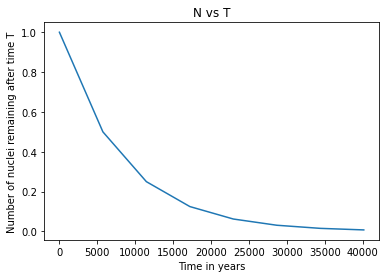

In [5]:
#1.4 plotting a curve of N versus T 
plt.plot(Time, radioDecay)
plt.xlabel('Time in years')
plt.ylabel('Number of nuclei remaining after time T')
plt.title('N vs T')

/srv/conda/envs/notebook/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3427: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


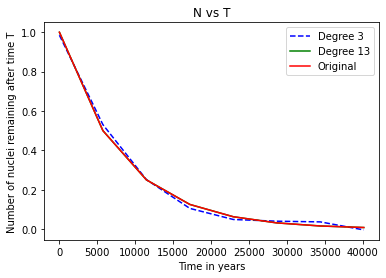

In [6]:
#1.5 Calculating the best fit polynomial to my N vs T curve using polyfit

#using degree 3
polyfit = np.polyfit(Time, radioDecay, 3)
model = np.polyval(polyfit, Time)
plt.plot(Time, model, 'b--', label = 'Degree 3')

#using degree 13 
polyfit = np.polyfit(Time, radioDecay, 13)
model = np.polyval(polyfit, Time)
plt.plot(Time, model, 'g-', label = 'Degree 13')

#original curve
plt.plot(Time, radioDecay,'r-',label='Original')
plt.xlabel('Time in years')
plt.ylabel('Number of nuclei remaining after time T')
plt.title('N vs T')
plt.legend(loc=1)

/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.61629e-25): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "


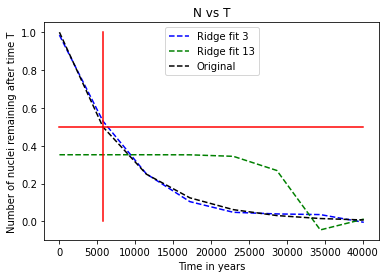

In [7]:
#1.5 Calculating the best fit polynomial to my N vs T curve using scikit

#define reg to be the function to transform data
reg = Ridge(alpha=1000)

#using degree 3
scipolyfit3 = PolynomialFeatures(degree=3)
#convert Time list to an array
arrayTime = np.array(Time)
Time_transform3 = scipolyfit3.fit_transform(arrayTime[:, np.newaxis])
#fit data
fit = reg.fit(Time_transform3, radioDecay)
#predict curve for interpolated points
N_reg = fit.predict(Time_transform3)
plt.plot(Time, N_reg, 'b--', label = 'Ridge fit 3')

#using degree 13
scipolyfit13 = PolynomialFeatures(degree=13)
Time_transform13 = scipolyfit13.fit_transform(arrayTime[:, np.newaxis])
fit = reg.fit(Time_transform13, radioDecay)
N_reg13 = fit.predict(Time_transform13)
plt.plot(Time, N_reg13, 'g--', label = 'Ridge fit 13')

#original curve
plt.plot(Time, radioDecay,'k--',label='Original')
plt.xlabel('Time in years')
plt.ylabel('Number of nuclei remaining after time T')
plt.title('N vs T')
plt.legend(loc=9)

#1.6 draw red vert line and horizon line 
plt.plot([halflife, halflife],[0,1],'r-',label='halflife')
plt.plot([0,40000],[0.5,0.5],'r-',label='0.5')

###  2. 2-D histograms,  contour plots and maps
1. Read the data file `Datasets/WUS_navdat.txt` into a pandas `DataFrame`.
2. Find all the igneous units with ages less than 6 Ma (Plio-Pleistosene).
3. Make a 2-D histogram of volcano locations in the Seattle area.
    1. Filter the data to be between 40 and 50 degrees latitude and -124 and -110 longitude.
    2. Make NumPy arrays for the latitude and longitude values.
    3. Make a matplotlib figure (`plt.figure()`) with height and width both equal to 10.
    4. A heatmap is really a 2-D histogram in color and there is a handy function in matplotlib that makes a  plot called `plt.hist2d()`.  Read the help message for that function.
    5. Call `plt.hist2d()` with  your longitude, latitude arrays as x and y and 25 bins.
    6. Label your x and y axes "Longitude" and "Latitude" respectively. 
    7. Make a big red star (`markersize = 25`) at the location of Seattle (47.61N,122.33W).  
    8. Give your plot the title "Volcano density near Seattle". 
4. Use `geoplot` to make a contour map for only the volcanoes near Seattle, in the same way that we did in Lecture 18. Plot a red star at the location of Seattle.


In [8]:
#2.1 reading datafile 
WUS = pd.read_csv('Datasets/WUS_navdat.txt', sep = '\t')
WUS.head()

,SAMPLE ID,CALCULATED AGE,CALCULATED MAX AGE,CALCULATED MIN AGE,LATITUDE,LONGITUDE,STATE
0,PENL-3,27.00,30.00,25.00,37.9483,-110.7789,UTAH
1,PENL-5,27.00,30.00,25.00,37.9550,-110.7881,UTAH
2,PENL-6,27.00,30.00,25.00,37.9564,-110.7878,UTAH
3,U19A\S1-2240D,12.85,12.80,12.90,37.2734,-116.3703,NEVADA
4,U19BA1-1935.8S,13.16,13.15,13.17,37.2943,-116.3130,NEVADA


In [9]:
#2.1 check the shape of the dataset
WUS.shape

(51133, 7)

In [10]:
#2.2 find all igneous units with ages less than 6 Ma

#use the loc function to filter through age 
filteredAge = WUS.loc[WUS['CALCULATED AGE'] < 6]
filteredAge.head()

,SAMPLE ID,CALCULATED AGE,CALCULATED MAX AGE,CALCULATED MIN AGE,LATITUDE,LONGITUDE,STATE
28,MB-657b,1.350000,1.80000,0.90000,48.893000,-121.70700,WASHINGTON
42,TM-3,0.002205,0.00223,0.00218,43.373055,-113.49416,IDAHO
57,MC88,0.330000,0.37000,0.29000,35.227500,-115.73150,CALIFORNIA
60,BB-1,0.006000,0.00660,0.00540,43.423610,-113.55250,IDAHO
72,82-91b,0.005500,0.00900,0.00200,41.472830,-122.69122,CALIFORNIA


In [11]:
#2.2 check the shape of the dataset
filteredAge.shape

(12083, 7)

In [12]:
#2.3 making a 2D histogram of volcano locations in the seattle area 
#part A: filtering the data for lat and lon
seattle = filteredAge[(filteredAge['LATITUDE']<50)&(filteredAge['LATITUDE']>40)&(filteredAge['LONGITUDE']<-110)&(filteredAge['LONGITUDE']>-124)]

#part B: make numpy arrays for lat and lon 
latArray = np.array(seattle['LATITUDE'])
lonArray = np.array(seattle['LONGITUDE'])

#part C: make matplotlib fig with h and w equal to 10 
plt.figure(1, (10,10))

#part D: read help message for function plt.hist2d
help(plt.hist2d)

Help on function hist2d in module matplotlib.pyplot:

hist2d(x, y, bins=10, range=None, density=False, weights=None, cmin=None, cmax=None, *, data=None, **kwargs)
    Make a 2D histogram plot.
    
    Parameters
    ----------
    x, y : array-like, shape (n, )
        Input values
    
    bins : None or int or [int, int] or array-like or [array, array]
    
        The bin specification:
    
        - If int, the number of bins for the two dimensions
          (nx=ny=bins).
        - If ``[int, int]``, the number of bins in each dimension
          (nx, ny = bins).
        - If array-like, the bin edges for the two dimensions
          (x_edges=y_edges=bins).
        - If ``[array, array]``, the bin edges in each dimension
          (x_edges, y_edges = bins).
    
        The default value is 10.
    
    range : array-like shape(2, 2), optional
        The leftmost and rightmost edges of the bins along each dimension
        (if not specified explicitly in the bins parameters): ``

<Figure size 720x720 with 0 Axes>

Text(0.5, 1.0, 'Volcano density near Seattle')

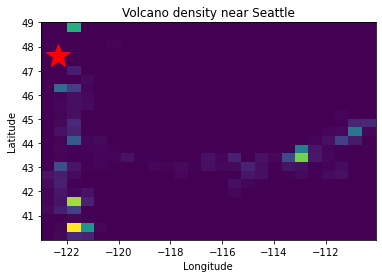

In [13]:
#part E: call plt.hist2d function
plt.hist2d(lonArray, latArray, bins = 25)

#part F: label x and y axes
plt.xlabel('Longitude')
plt.ylabel('Latitude')

#part G: make a big red star at location of seattle
plt.plot(-122.3321,47.6062,'r*',markersize=25)

#part H: title
plt.title('Volcano density near Seattle')

/srv/conda/envs/notebook/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/srv/conda/envs/notebook/lib/python3.8/site-packages/seaborn/distributions.py:1676: UserWarning: `shade_lowest` is now deprecated in favor of `thresh`. Setting `thresh=0.05`, but please update your code.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'Volcanic density in Seattle area')

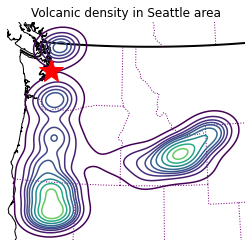

In [16]:
#2.4 use geoplot to make a contour map 

#putting in a geometry field 
gdf = gpd.GeoDataFrame(seattle, geometry = gpd.points_from_xy(seattle.LONGITUDE, seattle.LATITUDE))

proj = ccrs.LambertConformal(central_longitude = -115, central_latitude = 45)
ax = plt.axes(projection=proj)
ax.set_extent([-124,-110,40,50],crs=ccrs.PlateCarree())
ax.coastlines()
ax.add_feature(BORDERS, linestyle='-',linewidth=2)
states_provinces = cfeature.NaturalEarthFeature(
    category = 'cultural',
    name = 'admin_1_states_provinces_lines',
    scale = '50m',
    edgecolor = 'purple',
    facecolor = 'none',
    linestyle = 'dotted')
ax.add_feature(states_provinces)

gplt.kdeplot(gdf, ax=ax)
plt.plot(-122.3321,47.6062,'r*',markersize=25,transform=ccrs.Geodetic())
plt.title('Volcanic density in Seattle area')

In [ ]:
#code to use for a pointplot
gplt.pointplot(gdf, ax=ax, hue = 'CALCULATED AGE', legend = True)
ax.plot(-122.3321,47.6062, 'r*',markersize = 25, transform = ccrs.Geodetic())

### 3. Maps

People have been running observatories that measure the geomagnetic field since the mid-1800s and the US Geological Survey maintains a number of them throughout the US and US territories. The locations of the US array are available at this [website](https://www.usgs.gov/natural-hazards/geomagnetism/science/observatories?qt-science_center_objects=0#qt-science_center_objects).

The file that you can download from the USGS website above is a `.kmz` file suitable for importing into Google Earth. We have translated the locations of the observatories into a `.csv` file for you that can be directly loaded into a pandas `DataFrame`.  
1. Read the data file `Datasets/geomagnetic_observatories.csv` into a pandas `DataFrame`.
2. Make a $10 \times 10$ figure object.
3. Make an orthographic projection that shows all the locations of the observatories as red circles.
4. Put on the gridlines as in the lecture. 
5. Label the points with the code of the observatory name (taken from Series labelled `Code`). Place the text such that it appears above and to the right of each of the dots.

In [18]:
#3.1 read in the datafile as a pandas dataframe 
geomag = pd.read_csv('Datasets/geomagnetic_observatories.csv')
geomag.head()

,Name,Code,Lat.,Lon.
0,Barrow Observatory,BRW,71.322528,-156.624088
1,Boulder Observatory,BOU,40.137850,-105.237488
2,College Observatory,CMO,64.873745,-147.860612
3,Deadhorse Observatory,DED,70.353892,-148.794278
4,Fredericksburg Observatory,FRD,38.203788,-77.372985


['BRW', 'BOU', 'CMO', 'DED', 'FRD', 'FRN', 'GUA', 'HON', 'NEW', 'SJG', 'SHU', 'SIT', 'BSL', 'TUC']


/srv/conda/envs/notebook/lib/python3.8/site-packages/cartopy/io/__init__.py:260: DownloadWarning: Downloading: https://naciscdn.org/naturalearth/110m/physical/ne_110m_ocean.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)
/srv/conda/envs/notebook/lib/python3.8/site-packages/cartopy/io/__init__.py:260: DownloadWarning: Downloading: https://naciscdn.org/naturalearth/110m/physical/ne_110m_land.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)
/srv/conda/envs/notebook/lib/python3.8/site-packages/cartopy/io/__init__.py:260: DownloadWarning: Downloading: https://naciscdn.org/naturalearth/110m/physical/ne_110m_lakes.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)
/srv/conda/envs/notebook/lib/python3.8/site-packages/cartopy/io/__init__.py:260: DownloadWarning: Downloading: https://naciscdn.org/naturalearth/110m/physical/ne_110m_coastline.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)


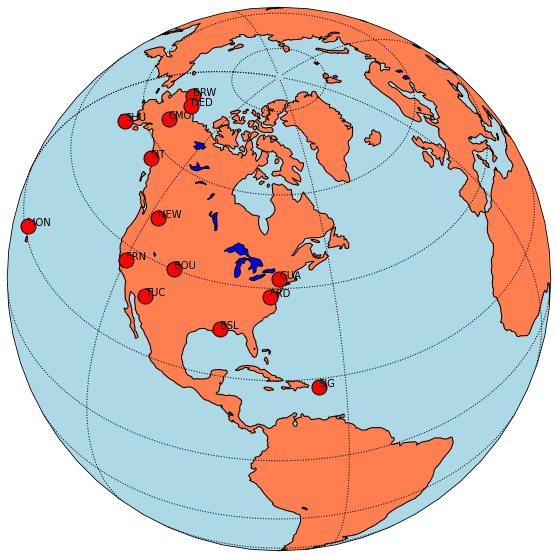

In [19]:
#3.2 making a 10 x 0 figure object 
plt.figure(1,(10,10))

#3.3-3.5 
latitude = geomag['Lat.'].values 
longitude = geomag['Lon.'].values
ax = plt.axes(projection=ccrs.Orthographic(-75.0,42.0))
gl = ax.gridlines(crs = ccrs.PlateCarree(), color = 'black', linewidth = 1, linestyle ='dotted')
gl.ylocator = mticker.FixedLocator(np.arange(-80.0, 81.0, 20.0))
gl.xlocator = mticker.FixedLocator(np.arange(-180.0,181.0,60.0));
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
ax.add_feature(OCEAN, color = 'lightblue')
ax.add_feature(LAND, color = 'coral')
ax.add_feature(LAKES, facecolor = 'blue', edgecolor = 'black')
ax.plot([longitude],[latitude], marker='o', color='red',markersize=15,transform=ccrs.Geodetic(),markeredgecolor = 'black')
ax.set_global()
ax.coastlines();

Code = geomag['Code']
codeArray = np.array(Code)
codes = Code.tolist()
print(codes)

for x in np.arange(0, len(codes)):
    plt.text(longitude[x],latitude[x],codes[x],transform=ccrs.Geodetic())

If you have trouble - contact the TA or the instructor - we are here to help!  

<div class="alert alert-block alert-danger"><b> 
To receive full credit, your notebook:
    
1. Must have the correct name;
2. Must be fully commented;
3. Must run as expected;
4. Must be submitted into Canvas before the deadline.
</b></div>